# 14 June 2022: Transactions by Currency
My initial excusion in the Knoedler dataset gave us a very rough sense of when the dealer was most active, as measured by number of incoming and outgoing transactions. But another way to gain insight into this question about the dealer's activity over time is to have a closer look at the profits generated by these transactions and how these changed over time. The dataset contains eight transaction categories that will be relevant in answering this questions:

<ul>
    <li><code>purch_currency</code> and <code>purch_amount</code>: The total amount paid for the object and the currency of that transaction</li>
    <li><code>knoedpurch_curr</code> and <code>knoedpurch_amt</code>: Knoedler's share of the total purchase price and the currency</li>
    <li><code>price_currency</code> and <code>price_amount</code>: The total amount paid for the object by the buyer and the accompanying currency</li>
    <li><code>knoedshare_curr</code> and <code>knoedshare_amt</code>: Knoelder's share of the amount paid by the buyer and the accompanying currency</li>
</ul>

As we can see, there are going to be a few factors that will complicate things for us. For example, it seems that Knoedler may have purchased and sold fractional shares of artworks (<code>knoedpurch_amt</code> and <code>knoedshare_amt</code>) in addition to being the sole buyer and sole seller of individual works (<code>purch_amount</code> and <code>price_amount</code>). It also appears that we may be confronting transactions in multiple currencies, which makes sense for a dealer who operated internationally. This means that we will eventually have to denominate all transactions in the same currency—most likely USD. And, of course, there will be the matter of adjusting transactions to present-day values since, as we saw in the last journal, they occurred over a period of a century.

Before we get ahead of ourselves, let's have a closer look at the columns in the dataset that concern us here. If we will eventually have to denominate all transactions in present-day USD, our first question might be: How many currencies are we dealing with? Then we can decide where to go next.

In [1]:
# Standard imports
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
knoedler = pd.read_csv('../data/knoedler.csv', low_memory=False)


Now let's have a peek at the currencies we're dealing with.

In [2]:
# Isolate the columns of interest
currency_columns = ['purch_currency', 'knoedpurch_curr', 'price_currency', 'knoedshare_curr']

# Count up the values
knoedler[currency_columns].apply(pd.Series.value_counts)

,purch_currency,knoedpurch_curr,price_currency,knoedshare_curr
Swiss francs,1,NaN,NaN,NaN
dollar,1,NaN,NaN,NaN
dollars,18842,3704.0,22343.0,716.0
florins,215,2.0,14.0,NaN
francs,10954,282.0,657.0,43.0
lire,2,1.0,1.0,NaN
marks,2286,3.0,9.0,NaN
pounds,4989,1116.0,2168.0,156.0
thalers,345,NaN,NaN,NaN


Let's make this information a little more useful—first by consolidating the <code>dollar</code> and <code>dollars</code> categories, then by adding columns that total each currency type, then by sorting the DataFrame in a useful way, and finally by adding totals for each column.

In [3]:
# Consolidate dollar/dollars
knoedler[knoedler.purch_currency == 'dollar'] = 'dollars'

# Create our new dataframe
currencies = knoedler[currency_columns].apply(pd.Series.value_counts)

# Total each row
currencies['total'] = currencies.sum(axis=1)

# Sort by totals
currencies.sort_values(by='total', ascending=False, inplace=True)

# Total each column
currencies.loc['total'] = currencies.sum(axis=0)

# Label index and columns
currencies.index.name = 'currency'
currencies.columns.name = 'transaction'

currencies

transaction,purch_currency,knoedpurch_curr,price_currency,knoedshare_curr,total
currency,,,,,
dollars,18843.0,3705.0,22343.0,717.0,45608.0
francs,10954.0,282.0,657.0,43.0,11936.0
pounds,4989.0,1116.0,2168.0,156.0,8429.0
marks,2286.0,3.0,9.0,NaN,2298.0
thalers,345.0,NaN,NaN,NaN,345.0
florins,215.0,2.0,14.0,NaN,231.0
lire,2.0,1.0,1.0,NaN,4.0
Swiss francs,1.0,NaN,NaN,NaN,1.0
total,37635.0,5109.0,25192.0,916.0,68852.0


Now we're getting somewhere! We can see that the vast majority of transactions were denominated in Dollars, after which we see still substantial numbers of transactions denominated in Francs, Pounds, and Marks. Among other things, this immediately validates what we know to have been Knoedler's primary markets: the United States, France, the United Kingdom, and Germany. Together, these four currencies comprise almost all of Knoedler's transactions, which means that, if we'd like to eventually denominate all transactions in present-day dollars (we would!), we will cover the vast majority of transations if we only perform the conversions for three currencies.

That's for later, however. For now, I want to get a visual sense of how these currencies break down over the various 
categories. In order to take advantage of Seaborn, I'm going to first flatten our dataset and reset the index:

In [4]:
currencies_flat = (
    currencies
    .iloc[:-1] # Exclude the "total" row
    .unstack()
    .reset_index()
)

currencies_flat

,transaction,currency,0
0,purch_currency,dollars,18843.0
1,purch_currency,francs,10954.0
2,purch_currency,pounds,4989.0
3,purch_currency,marks,2286.0
4,purch_currency,thalers,345.0
5,purch_currency,florins,215.0
6,purch_currency,lire,2.0
7,purch_currency,Swiss francs,1.0
8,knoedpurch_curr,dollars,3705.0
9,knoedpurch_curr,francs,282.0


Let's rename the rightmost column to something more descriptive:

In [5]:
currencies_flat.rename(columns={0:'count'}, inplace=True)
currencies_flat.columns

Index(['transaction', 'currency', 'count'], dtype='object')

We're ready to chart our new DataFrame. I'm going to draw two bar charts: one that shows the totals for each currency, regardless of transaction category (<code>currencies_flat['transaction'] == 'total'</code>); and the other that excludes the totals and instead differentiates the transaction categories (<code>currencies_flat['transaction'] != 'total' </code>).

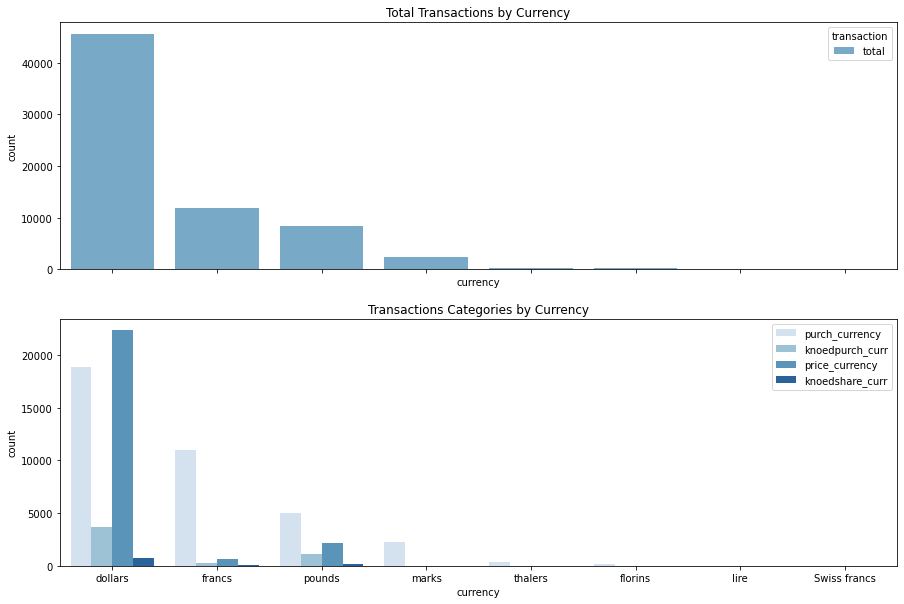

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(15,10),sharex=True)

# Chart total transactions by currency
sns.barplot(
    data=currencies_flat[currencies_flat.transaction == 'total'], 
    x='currency', 
    y='count', 
    hue='transaction', 
    palette='Blues', 
    ax=axs[0]
)
axs[0].set_title('Total Transactions by Currency')

# Chart transaction types by currency
sns.barplot(
    data=currencies_flat[currencies_flat.transaction != 'total'], 
    x='currency', 
    y='count', 
    hue='transaction', 
    palette='Blues', 
    dodge=True, 
    ax=axs[1]
)
axs[1].set_title('Transactions Categories by Currency')
axs[1].legend(loc='upper right');

This is a good initial picture of what's happening in the data. We can clearly see that the majority of transactions indeed do occur in dollars. We can also see that instances where Knoedler shared a purchase or a sale (<code>knoedpurch_curr</code> and <code>knoedshare_curr</code>) are rare. And the last thing that's noteable is that, while there are substantial numbers of purchases made in Francs, Pounds, and Marks, it is far rarer to see sales made in these currencies. This again confirms what we already know: that Knoedler was a U.S. dealer that seems to have regularly made purchases in Europe but done most of its selling stateside.

One question that emerges from these charts: Is it indeed true that dealer purchases denominated in non-USD currencies  tended to be sold in USD (suggesting, therefore, that Knoedler may have been acquiring abroad and selling stateside)? What about artworks that Knoedler sold in non-USD currency--what kinds of patterns can we observe there?

For now, though, the task at hand remains measuring how profits changed over time. With a better picture of the currencies used for transactions, I propose to perform historical conversions of francs, pounds, and marks to dollars (ignoring the relatively few numbers of transactions in other European currencies). From there, we will be in a position to adjust the historical dollar amounts to present-day dollars.